In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
Vehicles= r'C:\Users\HT\data\non-vehicles'
Non_Vehicles = r'C:\Users\HT\data\vehicles'

In [3]:
vehicles_data = os.listdir(Vehicles)
non_vehicles_data = os.listdir(Non_Vehicles)

In [4]:
print(vehicles_data[:5])
print(non_vehicles_data[:5])

['extra1.png', 'extra10.png', 'extra100.png', 'extra1000.png', 'extra1001.png']
['1.png', '10.png', '1000.png', '1001.png', '1002.png']


# Train-Test Split

In [5]:
Base_directory = '../Temp/'
Train_directory = os.path.join(Base_directory, 'train')
Test_directory = os.path.join(Base_directory, 'test')
Vehicles_train_data = os.path.join(Train_directory, 'vehicles')
Non_vehicles_train_data = os.path.join(Train_directory, 'non-vehicles')
Vehicles_test_data = os.path.join(Test_directory, 'vehicles')
Non_vehicles_test_data = os.path.join(Test_directory, 'non-vehicles')

In [6]:
from sklearn.model_selection import train_test_split
train_vehicles,test_vehicles = train_test_split(
    vehicles_data, train_size=0.7, shuffle=True, random_state=0)

In [7]:
train_non_vehicles,test_non_vehicles = train_test_split(
    non_vehicles_data, train_size=0.7, shuffle=True, random_state=0)

In [8]:
print('Train vehicle image data size:', len(train_vehicles))
print('Test vehicle image size:', len(train_non_vehicles))

print('Train vehicle image data size:', len(test_vehicles))
print('Test size for non vehicles:', len(test_non_vehicles))

Train vehicle image data size: 6277
Test vehicle image size: 6154
Train vehicle image data size: 2691
Test size for non vehicles: 2638


# Copy Images to New Directory

In [9]:
import shutil
def copy_images(images_lst,old_dir,new_dir):
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
    for file_name in images_lst:
        shutil.copy(
            os.path.join(old_dir, file_name),
            os.path.join(new_dir, file_name)
        )
    print(f'{len(images_lst)} Copying Image data to{new_dir}')

In [10]:
copy_images(train_vehicles, Vehicles, Vehicles_train_data)
copy_images(train_non_vehicles,Non_Vehicles, Non_vehicles_train_data)
copy_images(test_vehicles, Vehicles, Vehicles_test_data)
copy_images(test_non_vehicles, Non_Vehicles, Non_vehicles_test_data)


6277 Copying Image data to../Temp/train\vehicles
6154 Copying Image data to../Temp/train\non-vehicles
2691 Copying Image data to../Temp/test\vehicles
2638 Copying Image data to../Temp/test\non-vehicles


In [11]:
len(os.listdir(Vehicles_train_data))

6277

In [12]:
len(os.listdir(Non_vehicles_train_data))

6154

In [13]:
Image_size=250

In [14]:
import tensorflow as tf
from tensorflow.keras import layers 
train_data= tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./249
)

t_gen = train_data.flow_from_directory(
    Train_directory,
    target_size=(Image_size, Image_size),
    shuffle=True,
    class_mode='categorical'
)

test_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./249
)
test_gen = test_data.flow_from_directory(
    Test_directory,
    target_size=(Image_size, Image_size),
    class_mode='categorical'
)

Found 12431 images belonging to 2 classes.
Found 5329 images belonging to 2 classes.


# Convolutional Neural Network (CNN)

In [15]:
cnn_model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(Image_size, Image_size, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])
cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    loss_weights=None,
    run_eagerly=None,
    steps_per_execution=None,
    metrics=['accuracy']
)

In [16]:
#Training the Model

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    verbose=0,
    mode='auto'
)
model_path = 'vehicle_detection.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    save_best_only=True,
    save_freq="epoch",
    options=None
)

In [26]:
history= cnn_model.fit(
    t_gen,
    epochs=10,
    batch_size=128,
    verbose=1,
    validation_data=test_gen,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
389/389 [==============================] - 761s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
389/389 [==============================] - 815s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


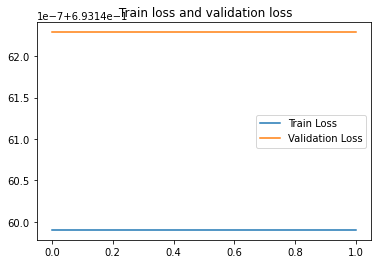

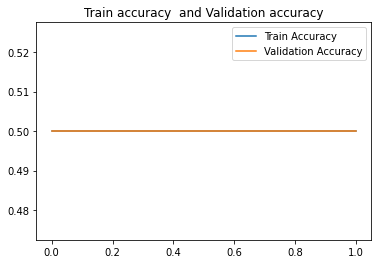

In [30]:
plt.title   (" Train loss and validation loss")
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.title("Train accuracy  and Validation accuracy")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()